In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:

df = pd.read_csv("Advertising.csv")
df.columns#printing all the columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [2]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.dtypes #Printing the datatypes of all columns

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [4]:
df['sales'].nunique()

121

Since sales column has 121 unique and float values hence this is a linear regression problem

In [9]:
df.isnull().sum()# Checking if coluumns have null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Data has no null values

In [12]:
#Checking coorelation of all columns with the target column
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

<AxesSubplot:>

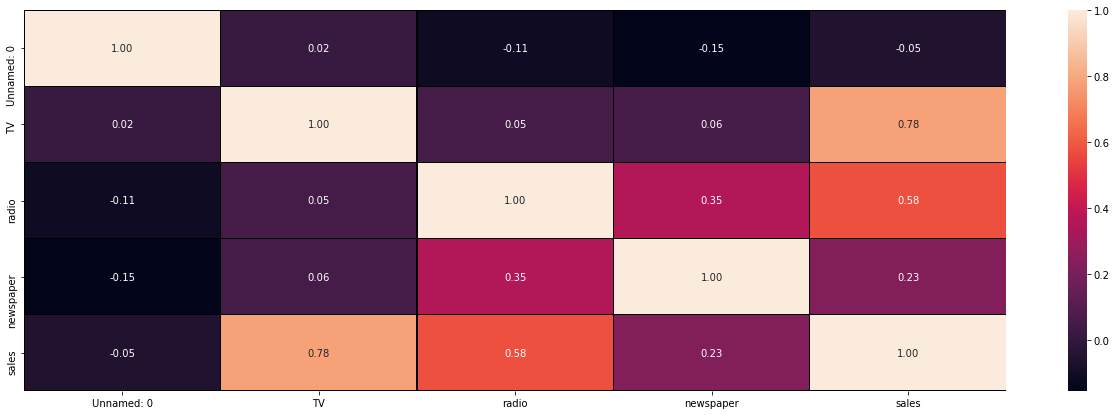

In [16]:
#drawing correlation heatmap
plt.figure(figsize =(22,7))
sns.heatmap(df.corr(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

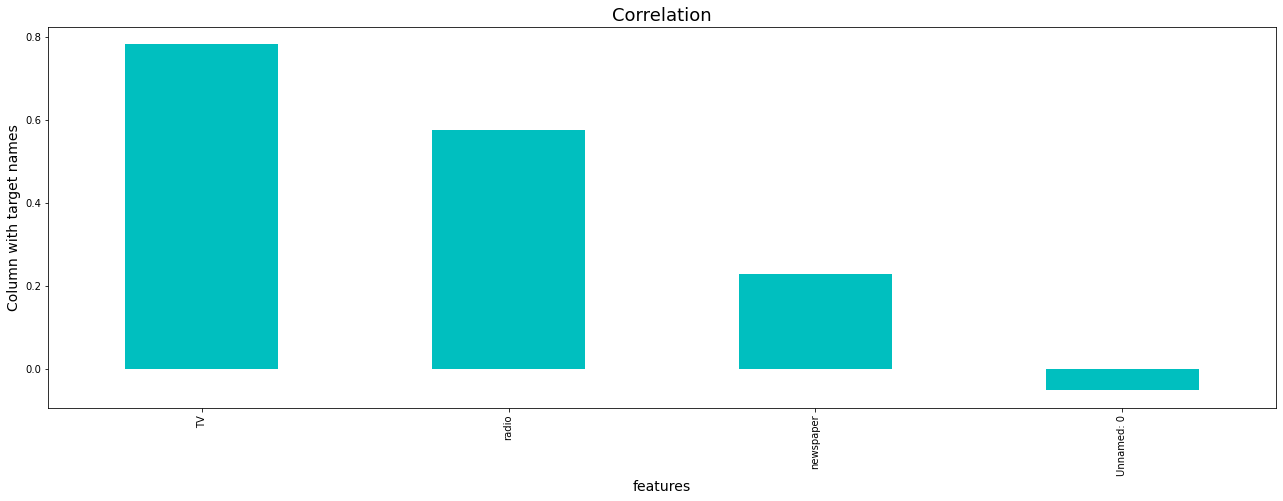

In [17]:
#Checking the correlation (+ve and -ve) with the target column in bar graph
plt.figure(figsize =(22,7))
df.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind= 'bar',color = "c")
plt.xlabel("features", fontsize = 14)
plt.ylabel("Column with target names", fontsize = 14)
plt.title("Correlation", fontsize =18)
plt.show()

In [21]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Taking +/-1.0 as the allowed range for skewness. All columns lie in this range.

<AxesSubplot:>

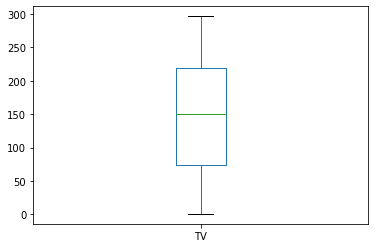

In [24]:
#Checking outliers for int and flot type columns (initially)
df["TV"].plot.box()

<AxesSubplot:>

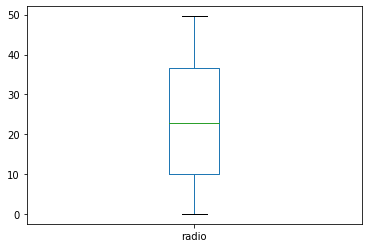

In [25]:
df["radio"].plot.box()

<AxesSubplot:>

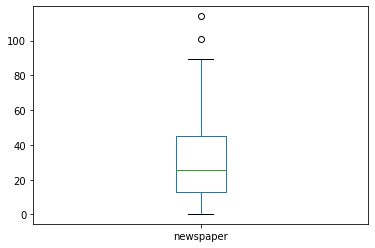

In [26]:
df["newspaper"].plot.box()

There are very few outliers in newspaper column so we can ignore them

In [28]:
#Seperating input and output as features and target
x = df.drop("sales",axis =1)
y = df["sales"]

In [29]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
mms = MinMaxScaler()
lr = LinearRegression()
warnings.filterwarnings("ignore")
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"at random state {i}, the train accuracy is: {r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the test accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

at random state 0, the train accuracy is: 0.9073274552252846
at random state 0, the test accuracy is: 0.856480214327925


at random state 1, the train accuracy is: 0.8959391993971187
at random state 1, the test accuracy is: 0.8928781912093181


at random state 2, the train accuracy is: 0.9152614531156523
at random state 2, the test accuracy is: 0.7570326409482367


at random state 3, the train accuracy is: 0.8931443451313652
at random state 3, the test accuracy is: 0.9134449674582059


at random state 4, the train accuracy is: 0.8911682084041699
at random state 4, the test accuracy is: 0.9084934434517352


at random state 5, the train accuracy is: 0.89570620107301
at random state 5, the test accuracy is: 0.89851958363058


at random state 6, the train accuracy is: 0.8915582028345674
at random state 6, the test accuracy is: 0.921941222913581


at random state 7, the train accuracy is: 0.8929171093102488
at random state 7, the test accuracy is: 0.9094946118605033


at random state 8, the

In [31]:
#we are selecting random state as 92 because at i=80 we are getting highest test accuracy
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =92)
#training the model
lr.fit(x_train,y_train)
#Predicting values
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.950983339269277


In [32]:
#Cross validation of model
Training_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
#Checking at what random state we have highest cross validation score and test accuracy
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)#cv = j means my data will be divided into j equal parts
    cv_mean= cv_score.mean()
    print(f"At cross fold {j} the cv score is: {cv_mean} and accuracy score for training is: {Training_accuracy} and accuracy for testing is: {Test_accuracy}")
    print("\n")      

At cross fold 2 the cv score is: 0.8557808905096393 and accuracy score for training is: -0.9027964201434033 and accuracy for testing is: 0.950983339269277


At cross fold 3 the cv score is: 0.8913539823868294 and accuracy score for training is: -0.9027964201434033 and accuracy for testing is: 0.950983339269277


At cross fold 4 the cv score is: 0.8858779626590163 and accuracy score for training is: -0.9027964201434033 and accuracy for testing is: 0.950983339269277


At cross fold 5 the cv score is: 0.8842777844741689 and accuracy score for training is: -0.9027964201434033 and accuracy for testing is: 0.950983339269277


At cross fold 6 the cv score is: 0.8877823078964706 and accuracy score for training is: -0.9027964201434033 and accuracy for testing is: 0.950983339269277


At cross fold 7 the cv score is: 0.8830284351379021 and accuracy score for training is: -0.9027964201434033 and accuracy for testing is: 0.950983339269277


At cross fold 8 the cv score is: 0.8795059347365249 and ac

Since we have highest cv score in cross fold 8 So we will select j=8 (as no impact of j on test score )

In [33]:
cv_score = cross_val_score(lr,x,y,cv=3)#cv = j means my data will be divided into j equal parts
cv_mean= cv_score.mean()

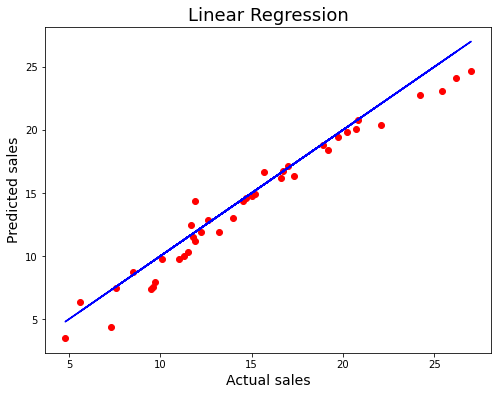

In [34]:
#drawing scatterplot to confirm the best fit line

import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x= y_test,y=pred_test,color = "r")
plt.plot(y_test,y_test, color = "b")
plt.xlabel("Actual sales",fontsize = 14)
plt.ylabel("Predicted sales", fontsize = 14)
plt.title("Linear Regression", fontsize = 18)
plt.savefig("lr.png")
plt.show()

best fit line is covering most of the datapoints which shows good fit of our model

In [36]:
#regularization to remove overfitting and underfitting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls =Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [39]:
#training as per best params
ls =Lasso(alpha =1, random_state = 0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

87.89850710796343

In [40]:
#getting ls score
lss = r2_score(y_test,pred_ls)
lss*100

95.14373613521977

In [41]:
#getting cv score
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

88.5886332944758

In [42]:
#Ensembling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
parameters = {'criterion':['mse','mse'],'max_features':["auto","sqrt","log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#training as per best params
rf =RandomForestRegressor(criterion ="mae", max_features = "auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)
#getting ls score
rfs= r2_score(y_test,pred_ls)
rfs*100
#getting cv score
rf_score = cross_val_score(rf,x,y,cv=5)
rf_mean = cv_score.mean()
rf_mean*100

{'criterion': 'mse', 'max_features': 'auto'}


88.5886332944758

In [43]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(rf,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result*100)
conclusion =pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])
conclusion

98.21485349768373


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,10.19,13.245,9.754,19.808,12.816,16.204,9.563,12.236,9.491,7.333,...,15.178,11.864,17.202,11.96,5.61,19.926,14.957,25.142,12.195,15.252
Original,10.19,13.245,9.754,19.808,12.816,16.204,9.563,12.236,9.491,7.333,...,15.178,11.864,17.202,11.96,5.61,19.926,14.957,25.142,12.195,15.252
